In [112]:
import imaplib
import os
import email
import matplotlib.pyplot as plt
import pandas as pd
# import db_manager

In [138]:
from bs4 import BeautifulSoup

In [114]:
df = pd.read_csv('data.csv')

In [115]:
df.head()

,Unnamed: 0,email_id,subject,content,cluster
0,0,17507c6cd2f5de5a,"Hello Mayur, Please use the below Login Code t...",SGVsbG8gPHN0cm9uZz5NYXl1cjwvc3Ryb25nPiw8YnI-PG...,0
1,1,175078fa6fa568ee,Hey KMKnation! A third-party OAuth application...,SGV5IEtNS25hdGlvbiENCg0KQSB0aGlyZC1wYXJ0eSBPQX...,0
2,2,175076ed7c8139a7,"Hi Mayur Kanojiya, 1357 users successfully sol...",PCFET0NUWVBFIGh0bWwgUFVCTElDICItLy9XM0MvL0RURC...,0
3,3,1750750fadae357a,Speakers Facebook Twitter Linkedin Instagram y...,PCFET0NUWVBFIGh0bWwNCglQVUJMSUMgIi0vL1czQy8vRF...,0
4,4,175070e2e853644e,Presenting OST: Official Snack Time on Swiggy ...,PCFET0NUWVBFIGh0bWwgUFVCTElDICItLy9XM0MvL0RURC...,0


In [116]:
df.shape

(2473, 5)

In [117]:
import base64


def decode(text):
    text = base64.urlsafe_b64decode(text).decode('utf-8')
    return text

In [118]:
df['content'] = df['content'].apply(lambda content: decode(content))

In [119]:
df.head()

,Unnamed: 0,email_id,subject,content,cluster
0,0,17507c6cd2f5de5a,"Hello Mayur, Please use the below Login Code t...","Hello <strong>Mayur</strong>,<br><br>Please us...",0
1,1,175078fa6fa568ee,Hey KMKnation! A third-party OAuth application...,Hey KMKnation!\r\n\r\nA third-party OAuth appl...,0
2,2,175076ed7c8139a7,"Hi Mayur Kanojiya, 1357 users successfully sol...","<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",0
3,3,1750750fadae357a,Speakers Facebook Twitter Linkedin Instagram y...,"<!DOCTYPE html\r\n\tPUBLIC ""-//W3C//DTD XHTML ...",0
4,4,175070e2e853644e,Presenting OST: Official Snack Time on Swiggy ...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",0


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [121]:
#ltk.download()

In [103]:
nltk.download('stopwords')
##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/hb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
def clean_text(text):
    text = BeautifulSoup(str(text), "lxml").text
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    tokens = [word.lower() for word in tokens]
    text = [word for word in tokens if word not in stopword]
    text = [word for word in text if len(word) > 1]
    return text


In [140]:
df['content_clean'] = df['content'].apply(lambda x: clean_text(x))

In [141]:
df[['content','content_clean']].head()

,content,content_clean
0,"Hello <strong>Mayur</strong>,<br><br>Please us...","[hello, mayurplease, use, login, code, log, ra..."
1,Hey KMKnation!\r\n\r\nA third-party OAuth appl...,"[hey, kmknation, thirdparty, oauth, applicatio..."
2,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...","[bodypadding0, margin0, media, screen, maxwidt..."
3,"<!DOCTYPE html\r\n\tPUBLIC ""-//W3C//DTD XHTML ...","[raise, 2020, margin, padding, body, width, 60..."
4,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...","[email, template, body, padding, important, ma..."


In [142]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [143]:
data_matrix=vectorizer.fit_transform(df['content'])
print("\n Feature names Identified :\n")
# print(vectorizer.get_feature_names())


 Feature names Identified :



In [144]:
data_matrix.shape

(2473, 22958)

In [145]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


10processed
11processed
12processed
13processed
14processed
15processed
16processed
17processed
18processed
19processed
20processed
21processed
22processed
23processed
24processed
25processed
26processed
27processed
28processed
29processed
30processed
31processed
32processed
33processed
34processed
35processed
36processed
37processed
38processed
39processed
40processed
41processed
42processed
43processed
44processed
45processed
46processed
47processed
48processed
49processed
50processed
51processed
52processed
53processed
54processed
55processed
56processed
57processed
58processed
59processed
60processed
61processed
62processed
63processed
64processed
65processed
66processed
67processed
68processed
69processed
70processed
71processed
72processed
73processed
74processed
75processed
76processed
77processed
78processed
79processed
80processed
81processed
82processed
83processed
84processed
85processed
86processed
87processed
88processed
89processed
90processed
91processed
92processed
93pr

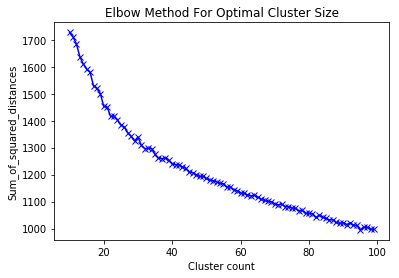

In [146]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(10,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_matrix)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [147]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=32).fit(data_matrix)

#get Cluster labels.
clusters=kmeans.labels_

In [148]:
df['cluster'] = clusters

In [149]:
df[df['cluster'] == 1]

,Unnamed: 0,email_id,subject,content,cluster,content_clean
4,4,175070e2e853644e,Presenting OST: Official Snack Time on Swiggy ...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",1,"[email, template, body, padding, important, ma..."
14,14,175021478937a322,The secret to saving even more during Swiggy M...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."
25,25,174fd3b2c26e571a,The secret to saving even more during Swiggy M...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."
28,28,174fce717f3735bb,Move your skills forward with the help of an a...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,"[udemy, import, urlhttpsfontsgoogleapiscomcssf..."
35,35,174f80b78e080dad,The secret to saving even more during Swiggy M...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."
37,37,174f70612ebbbc44,Behind every success story is an instructor sh...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,"[udemy, import, urlhttpsfontsgoogleapiscomcssf..."
40,40,174f30fd89174a7c,Order during Swiggy Match Day Mania and stand ...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."
53,53,174e803d33439a15,The secret to saving even more during Swiggy M...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."
59,59,174e2beef7c414eb,Read how Swiggy&#39;s brightened the lives of ...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."
66,66,174ddeee2e0c9d16,Don&#39;t want convenience delivered to your i...,<!DOCTYPE html>\r\n<html>\r\n\r\n<head>\r\n ...,1,"[email, template, body, padding, important, ma..."


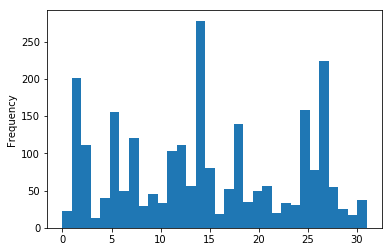

In [159]:
df['cluster'].plot(kind='hist', bins=32)


Group :  0 
-------------------


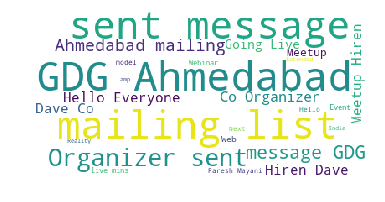


Group :  1 
-------------------


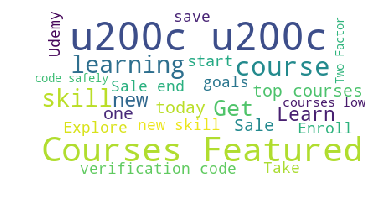


Group :  2 
-------------------


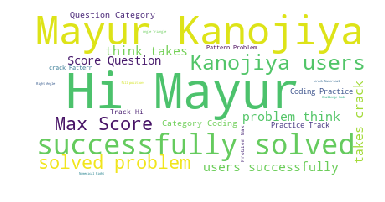


Group :  3 
-------------------


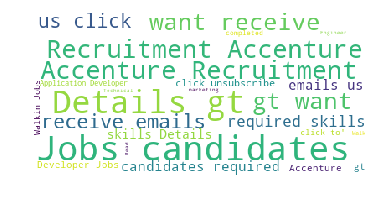


Group :  4 
-------------------


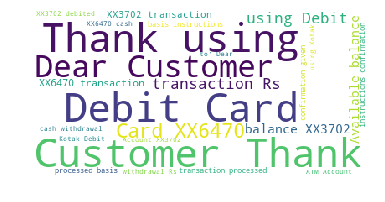


Group :  5 
-------------------


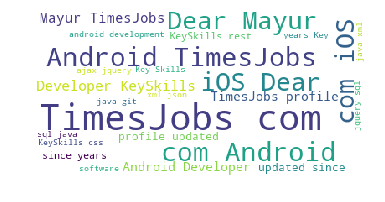


Group :  6 
-------------------


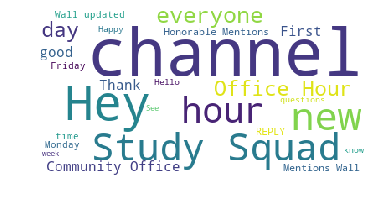


Group :  7 
-------------------


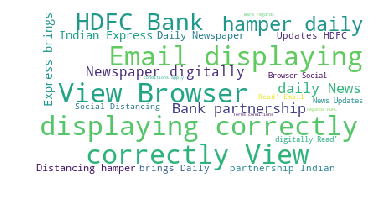


Group :  8 
-------------------


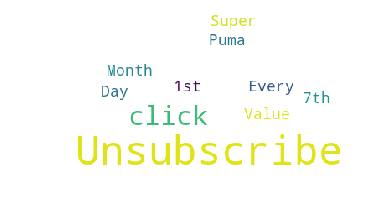


Group :  9 
-------------------


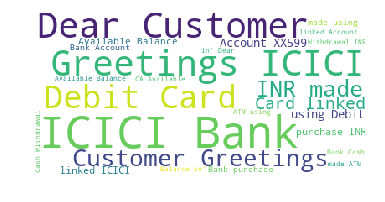


Group :  10 
-------------------


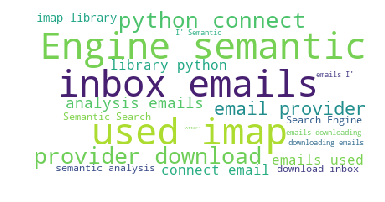


Group :  11 
-------------------


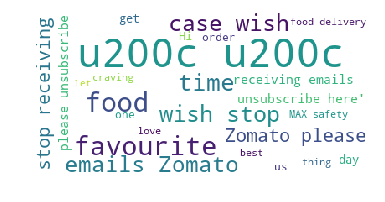


Group :  12 
-------------------


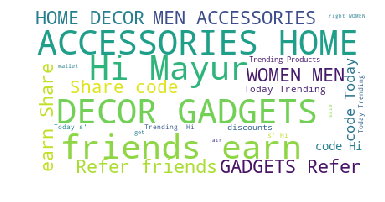


Group :  13 
-------------------


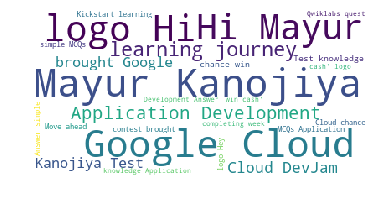


Group :  14 
-------------------


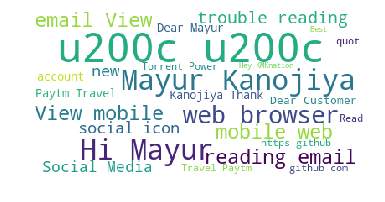


Group :  15 
-------------------


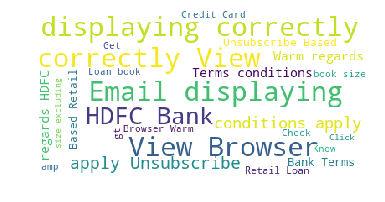


Group :  16 
-------------------


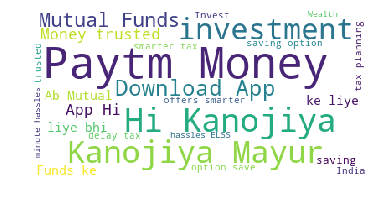


Group :  17 
-------------------


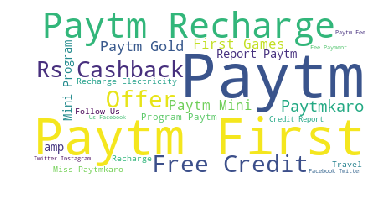


Group :  18 
-------------------


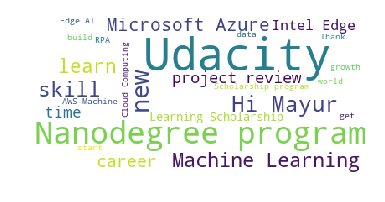


Group :  19 
-------------------


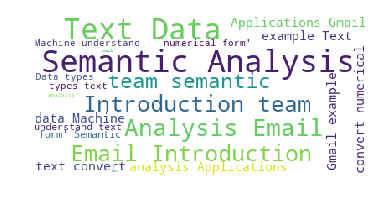


Group :  20 
-------------------


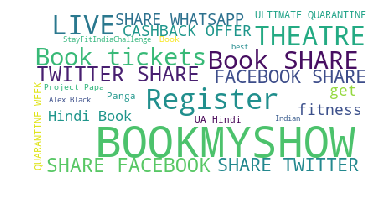


Group :  21 
-------------------


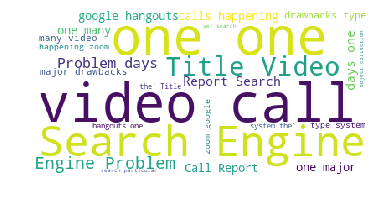


Group :  22 
-------------------


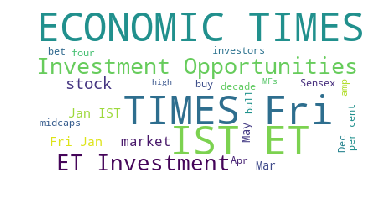


Group :  23 
-------------------


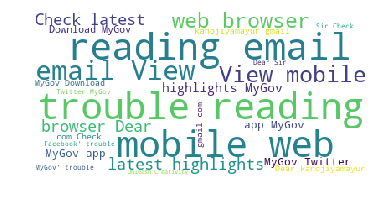


Group :  24 
-------------------


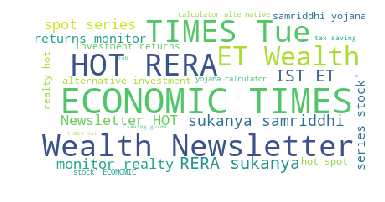


Group :  25 
-------------------


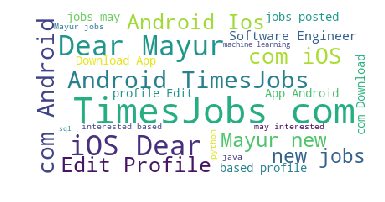


Group :  26 
-------------------


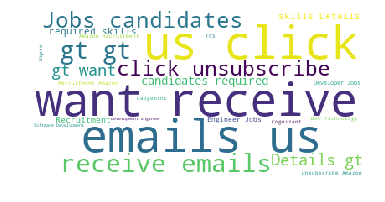


Group :  27 
-------------------


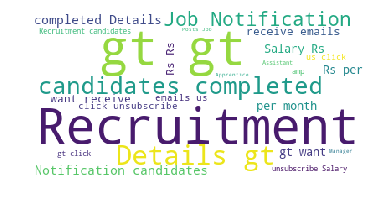


Group :  28 
-------------------


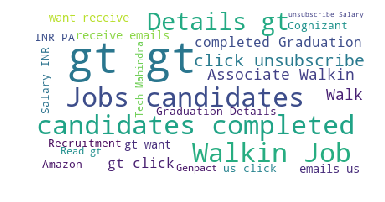


Group :  29 
-------------------


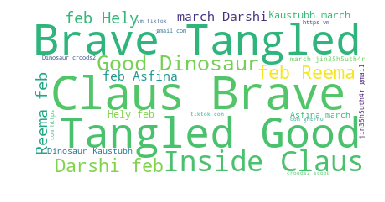


Group :  30 
-------------------


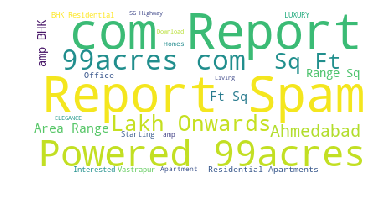


Group :  31 
-------------------


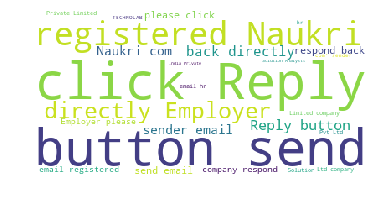

In [151]:
#Print cluster label and Courses under each cluster
from wordcloud import WordCloud
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(str(df[df['cluster'] == group]['subject'].values))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [152]:
custom_data = ["Times"]

custom_matrix=vectorizer.transform(custom_data)


In [153]:
custom_matrix.shape

(1, 22958)

In [154]:
a = kmeans.predict(custom_matrix)

In [155]:
a

array([14], dtype=int32)

Save the vectorizers and model

In [156]:
import pickle

In [157]:
pickle.dump(kmeans, open("kmeans.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf.pickle", "wb"))

Now lets compare the eucledean distance of two sentences to see simillarity between them